<a href="https://colab.research.google.com/github/TammaRizqiWiryawan/DAA/blob/main/latihan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Studi Kasus 1
#adjacency matrix
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        # Calculate the pagerank contribution from each linking page
        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_pages:
            new_page_rank[j] += page_rank[linking_page] / np.sum(adjacency_matrix[linking_page, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(page {page + 1}) = {rank:.3f}")


PR(page 1) = 0.122
PR(page 2) = 0.302
PR(page 3) = 0.378
PR(page 4) = 0.198


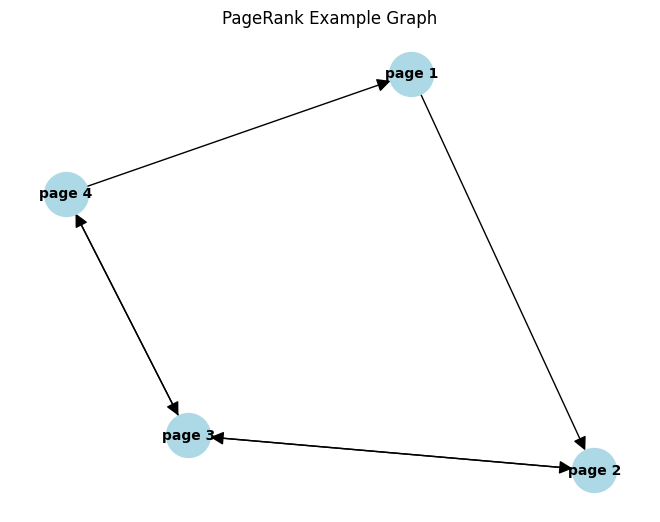

In [ ]:
#membuat graph dari adjacency matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Create the directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)  # Layout the graph
labels = {i: f"page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()


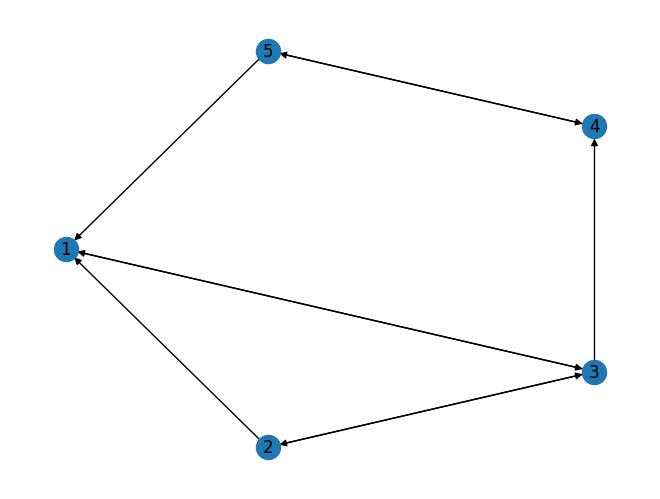

In [ ]:
#studi Kasus 2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
myWeb = nx.DiGraph()
myPages = range(1,5)
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [ ]:
#implementasi algoritma pagerank

import networkx as nx
import numpy as np

def CreatPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

#contoh penggunaan
myWeb = nx.DiGraph()
connections = [(1,3), (2,1), (2,3), (3,1), (3,2), (3,4), (4,5), (5,1), (5,4)]
myWeb.add_edges_from(connections)

G, p = CreatPageRank(myWeb)
print(G)


[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [ ]:
#studi kasus 3

import numpy as np

#matrix adjacency(0 berarti tidak ada tautan, 1 berarti ada tautan)
adjacency_matrix = np.array([[0,1,1,1,0],
                             [0,0,1,0,0],
                             [1,0,0,0,0],
                             [0,0,1,0,1],
                             [0,0,1,1,0]])

#inisialisasi nilai awal pagerank
pagerank = np.array([1,1,1,1,1], dtype = float)

#faktor damping
damping_factor = 0.85

#jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  #inisialisasi pagerank baru
  new_pagerank = np.zeros(pagerank.shape, dtype = float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      #hitung jumlah tautan yang keluar dari halaman i
      num_outlinks = np.sum(adjacency_matrix[i, :])

      #perbarui pagerank berdasarkan rumus pagerank
      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

  #normalisasi pagerank
  new_pagerank += (1- damping_factor) / len(pagerank)

  #perbarui nilai pagerank
  pagerank = new_pagerank

#hasil pagerank
print("hasil pagerank: ")
print(pagerank)

hasil pagerank: 
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [ ]:
import numpy as np

#jumlah halaman
num_pages = 5

#vectors of outlinks
outlinks = np.array([3,2,1,2,2])

#vectors of inlinks
inlinks = np.array([1,2,1,2,1])

#inisialisasi nilai awal pagerank
pagerank = np.ones(num_pages, dtype=float) / num_pages

#faktor damping
damping_factor = 0.85

#jumlah iterasi
nums_iterations = 100

for _ in range(num_iterations):
  #inisialisasi pagerank baru
  new_pagerank = np.zeros(pagerank.shape, dtype = float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
        new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

  #terapkan faktor damping dan tambahkan nilai konstan
  pagerank = (1- damping_factor) / num_pages + new_pagerank

#hasil pagerank
print("hasil pagerank:")
for i, pr in enumerate(pagerank):
  print(f"halaman {chr(ord('A')+i)}: {pr:.4f}")

hasil pagerank:
halaman A: 379781916076663755421777920.0000
halaman B: 356329657326501560173199360.0000
halaman C: 300635253803169860934434816.0000
halaman D: 356329657326501628892676096.0000
halaman E: 356329657326501628892676096.0000


<ipython-input-71-ab6422f83e6f>:11: RuntimeWarning: divide by zero encountered in divide
  prob_outwards = np.array(1.0 / outwards)
<ipython-input-71-ab6422f83e6f>:12: RuntimeWarning: invalid value encountered in multiply
  A = np.multiply(M, prob_outwards[:, np.newaxis])


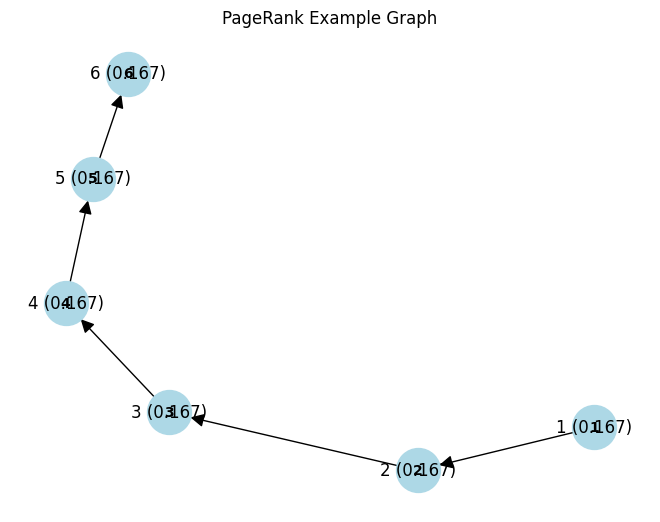

In [ ]:
# LATIHAN 1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def PageRank(Graph):
    nodes_set = len(Graph)
    M = nx.to_numpy_array(Graph)
    # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    A = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return A, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
myWeb.add_edges_from(connections)

A, p = PageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()

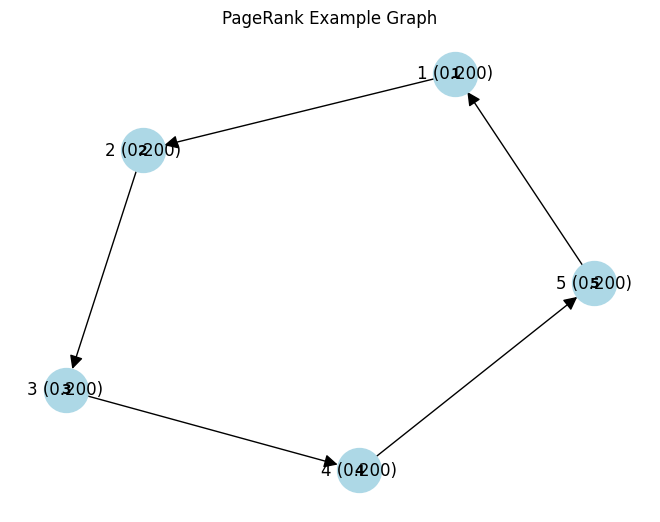

In [ ]:
#LATIHAN 2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def PageRank(Graph):
    nodes_set = len(Graph)
    M = nx.to_numpy_array(Graph)
    # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    A = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return A, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5,1)]
myWeb.add_edges_from(connections)

A, p = PageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()

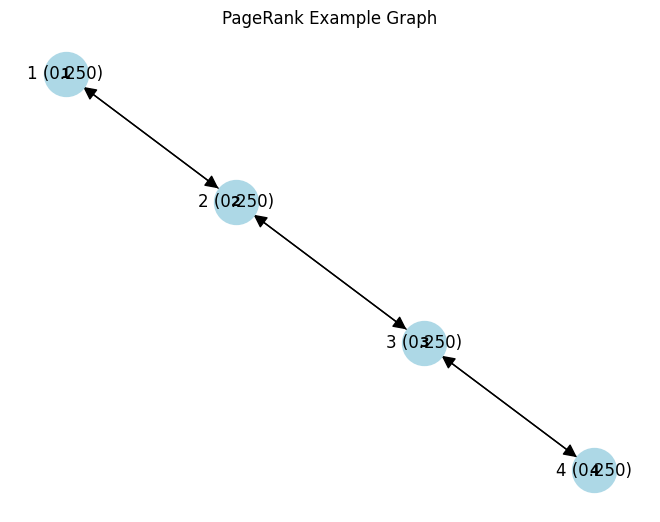

In [ ]:
# LATIHAN 3
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def PageRank(Graph):
    nodes_set = len(Graph)
    M = nx.to_numpy_array(Graph)
    # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    A = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return A, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 3), (3, 2), (2, 1)]
myWeb.add_edges_from(connections)

A, p = PageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()

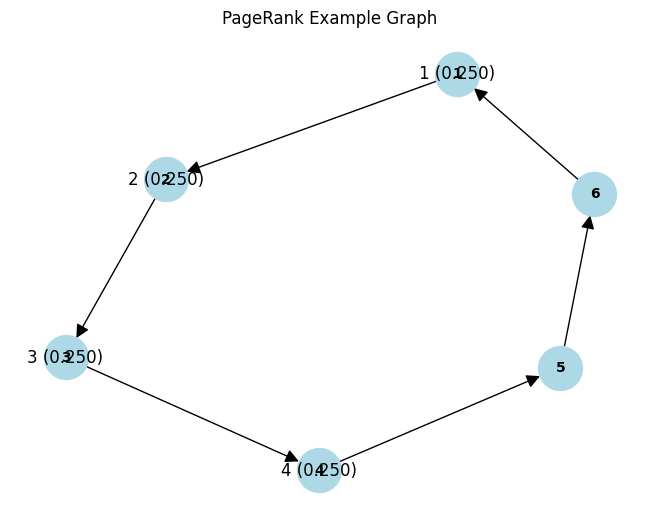

In [ ]:
# LATIHAN 4
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def PageRank(Graph):
    nodes_set = len(Graph)
    M = nx.to_numpy_array(Graph)
    # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    P = np.multiply(M, prob_outwards[:, np.newaxis])

    R = np.ones(nodes_set) / float(nodes_set)
    return P, R

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]
myWeb.add_edges_from(connections)

P, R = PageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()

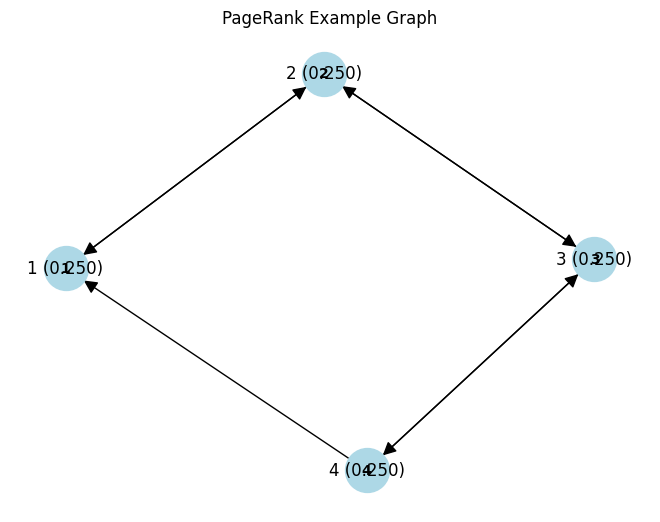

In [ ]:
# LATIHAN 5
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def PageRank(Graph):
    nodes_set = len(Graph)
    M = nx.to_numpy_array(Graph)
    # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    P = np.multiply(M, prob_outwards[:, np.newaxis])

    R = np.ones(nodes_set) / float(nodes_set)
    return P, R

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 1), (4, 3), (3, 2), (2, 1)]
myWeb.add_edges_from(connections)

P, R = PageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()

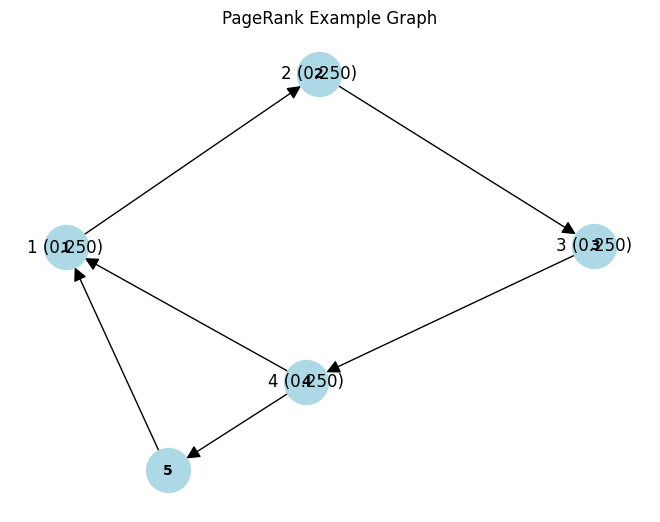

In [ ]:
# LATIHAN 6
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def PageRank(Graph):
    nodes_set = len(Graph)
    M = nx.to_numpy_array(Graph)
    # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    P = np.multiply(M, prob_outwards[:, np.newaxis])

    R = np.ones(nodes_set) / float(nodes_set)
    return P, R

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (4, 1), (5, 1)]
myWeb.add_edges_from(connections)

P, R = PageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()

<ipython-input-83-dc5eb094ea9a>:11: RuntimeWarning: divide by zero encountered in divide
  prob_outwards = np.array(1.0 / outwards)
<ipython-input-83-dc5eb094ea9a>:12: RuntimeWarning: invalid value encountered in multiply
  P = np.multiply(M, prob_outwards[:, np.newaxis])


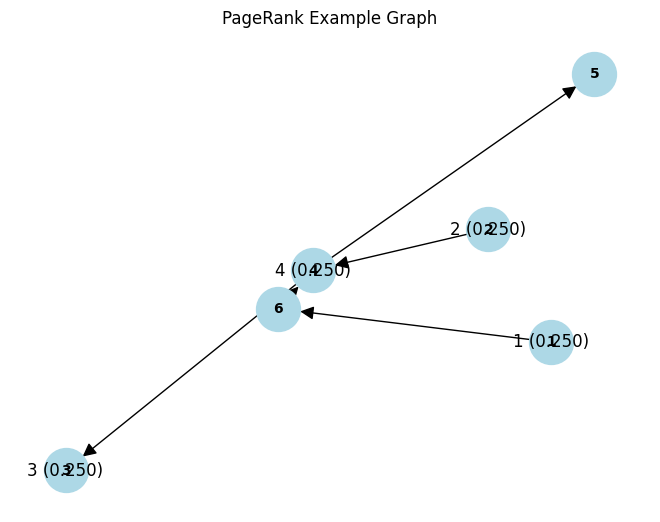

In [ ]:
#LATIHAN 7
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def PageRank(Graph):
    nodes_set = len(Graph)
    M = nx.to_numpy_array(Graph)
    # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    P = np.multiply(M, prob_outwards[:, np.newaxis])

    R = np.ones(nodes_set) / float(nodes_set)
    return P, R

myWeb = nx.DiGraph()
connections = [(1, 6), (2, 4), (4, 3), (4, 5), (6,4),]
myWeb.add_edges_from(connections)

P, R = PageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels,node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()

Buatlah analisa penerapan algoritma page rank dalam menjawab permasalahan sosial atau kehidupan manusia.

Contoh penggunaan algoritma PageRank dalam kehidupan manusia adalah dalam penentuan popularitas seseorang di media sosial. Seseorang yang memiliki banyak pengikut dan tautan yang mengarah ke akun media sosialnya akan memiliki peringkat yang lebih tinggi dibandingkan dengan orang yang memiliki sedikit pengikut dan tautan. Hal ini dapat mempengaruhi popularitas seseorang di media sosial dan dapat membantu dalam membangun citra atau merek pribadi.

Dalam lingkungan sosial orang-orang dapat dianggap sebagai "node" dalam jaringan sosial. Hubungan antara orang-orang tersebut dapat diukur sebagai "link" antara node-node tersebut. Dalam konteks ini, PageRank dapat diubah sedemikian rupa sehingga tidak hanya mengukur hubungan sosial, tetapi juga tingkat pengaruh atau keberpengaruhannya dalam masyarakat. Dengan cara ini, algoritma PageRank dapat digunakan untuk mengidentifikasi individu-individu yang memiliki pengaruh besar dalam jaringan sosial, yang dapat membantu dalam memahami dinamika sosial dan memecahkan masalah sosial.
